# Importing all the required libraries and the CIFAR10 dataset

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10   #-------------------------------# This is the dataset in question
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

### CIFAR10 dataset is basically an image classification problem that contains 60,000 images split as 50,000 training and 10,000 testing samples respectively. It is a classification problem that contains 10 categories or classes that need to be categorized accordingly. A brief description of CIFAR10 is as follows:
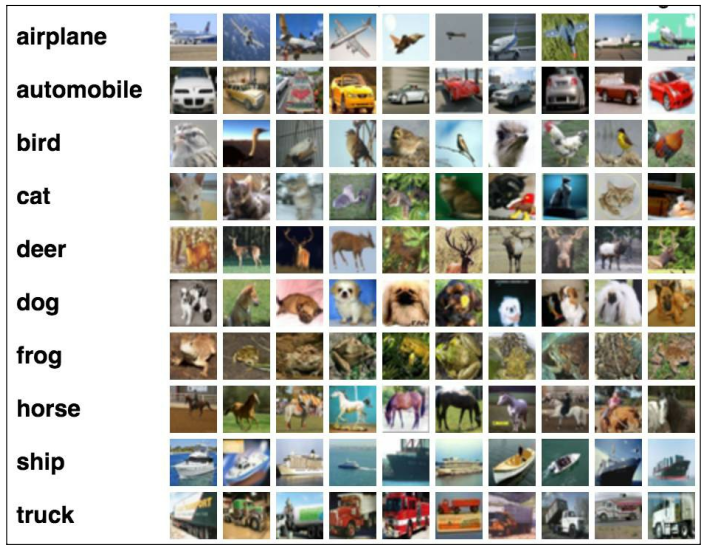
Image courtesy :  https://www.cs.toronto.edu/~kriz/cifar.html

## Specifying a few parameters before hand. We will use them down the line in the code

In [2]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of classes present in the dataset
data_augmentation = False

# Splitting the data into train and test sets

In [3]:
# We split the data into train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


 # Data Pre-processing

C:\Users\GLNB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\GLNB\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


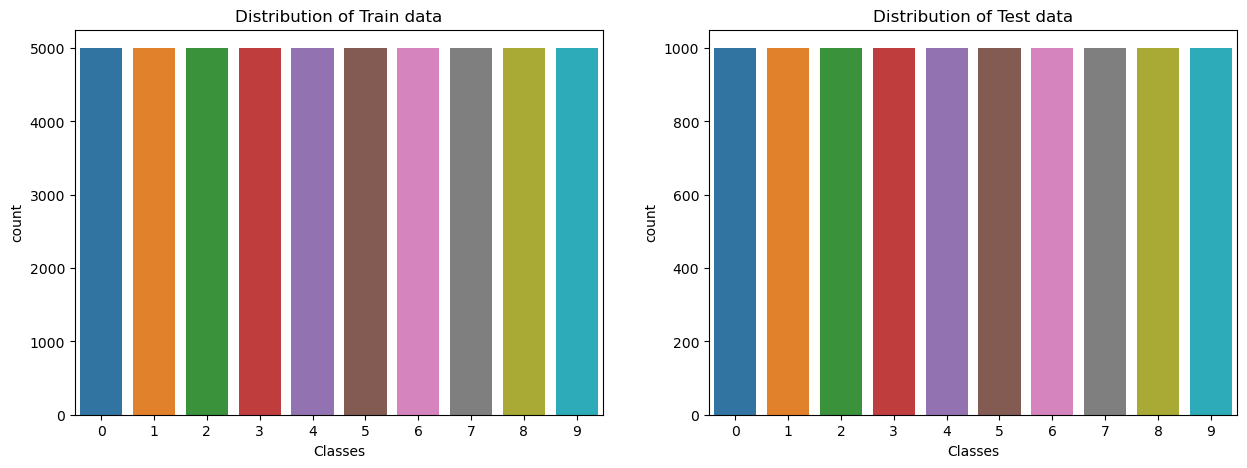

In [4]:
fig, axs = plt.subplots(1,2,figsize=(15,5))


# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of Train data')
axs[0].set_xlabel('Classes')


# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Test data')
axs[1].set_xlabel('Classes')
plt.show()

### The above step was performed in order to ensure the absence of class imbalance. As it is evident, each class has equal amount of train and test splits so that we need not alter the data.

In [5]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### The normalization was done because the algorithm takes 0s and 1s as inputs and gives out the same as output, which, will later be converted back to images. 

# Building the Neural Network

In [6]:
# We Build the Neural Network in this step

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))


#Summary of the neural net
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

### - The first layer of the neural net consists of a 2D convolution filter with 32 filters, 'Relu' as the activation function

### - The second layer of the neural net consists of a 2x2 MaxPooling layer

### - The third layer again has a 2D convolution filter with 64 filters this time and again, 'Relu' as the activation function

### - The fourth layer is same as that of the second layer

### - We then flatten the neural net in the 5th layer and pass it through four densely connected layers whose 3 activation funstions are'Relu' and the last one being 'Softmax'

### - The activation functions 'Relu' and 'Softmax' are the ones commonly used for classification tasks

# Compiling the Neural Network
 ### Before compiling, following are the parameters to be mentioned to avoid redundancy in the neural net:
 #### 1. A Loss Function : To determine the goodness of the neural net
 #### 2. An Optimizer: To ensure maximum data usage for model building and reduce loss.
 #### 3. Metrics: To monitor the performance of the neural net.
 
 ### Also, data_augmentation hyperparameter is used to avoid overfitting of the data onto the model, which happens to be a common thing while dealing with neural nets. By setting it to false, we are basically not transforming the data in any possible manner ( rotating, flipping, cropping, etc.)

In [7]:
# Compiling the neural net
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 7)

In [9]:
cnnModel = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs= 15,
              validation_data=(x_test, y_test),
              shuffle=True,callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.4790 - accuracy: 0.4604 - val_loss: 1.3169 - val_accuracy: 0.5264
Epoch 2/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0904 - accuracy: 0.6140 - val_loss: 1.0475 - val_accuracy: 0.6281
Epoch 3/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8909 - accuracy: 0.6865 - val_loss: 0.9451 - val_accuracy: 0.6674
Epoch 4/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.7397 - accuracy: 0.7421 - val_loss: 0.9120 - val_accuracy: 0.6943
Epoch 5/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6074 - accuracy: 0.7890 - val_loss: 1.0105 - val_accuracy: 0.6734
Epoch 6/15
1563/1563 [==============================] - 55s 35ms/step - loss: 0.4853 - accuracy: 0.8294 - val_loss: 1.0388 - val_accuracy: 0.6783
Epoch 7/15
1563/1563 [==============================] - 59s 37ms/step - loss: 0.3871 - accuracy: 0.8640 - val_loss: 1.1760 -

# Plotting the performance of the model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


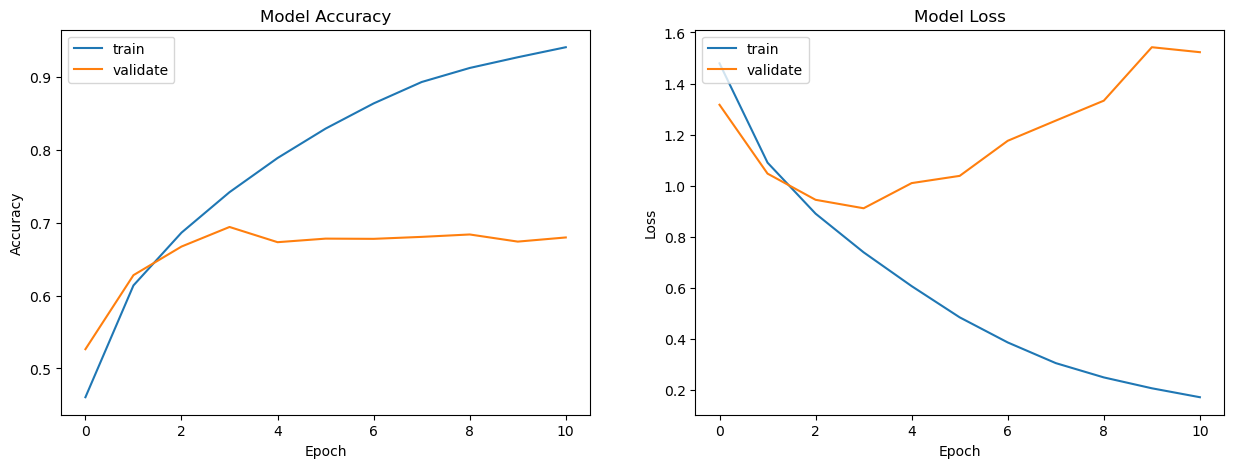

In [10]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    
    # summarize history for accuracy
    axs[0].plot(cnnModel.history['accuracy']) 
    axs[0].plot(cnnModel.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    
    # summarize history for loss
    axs[1].plot(cnnModel.history['loss']) 
    axs[1].plot(cnnModel.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(cnnModel.history.keys())

plotmodelhistory(cnnModel)

### The above graphs show the performance on accuracy and loss of the model with respect to the train and validation datasets

# Testing the model's performance using the test dataset

In [11]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.5226 - accuracy: 0.6799
Test loss: 1.522578477859497
Test accuracy: 0.6798999905586243
313/313 [==============================] - 4s 13ms/step


# Drawing the confusion matrix for the predictions (10x10 matrix)

In [12]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

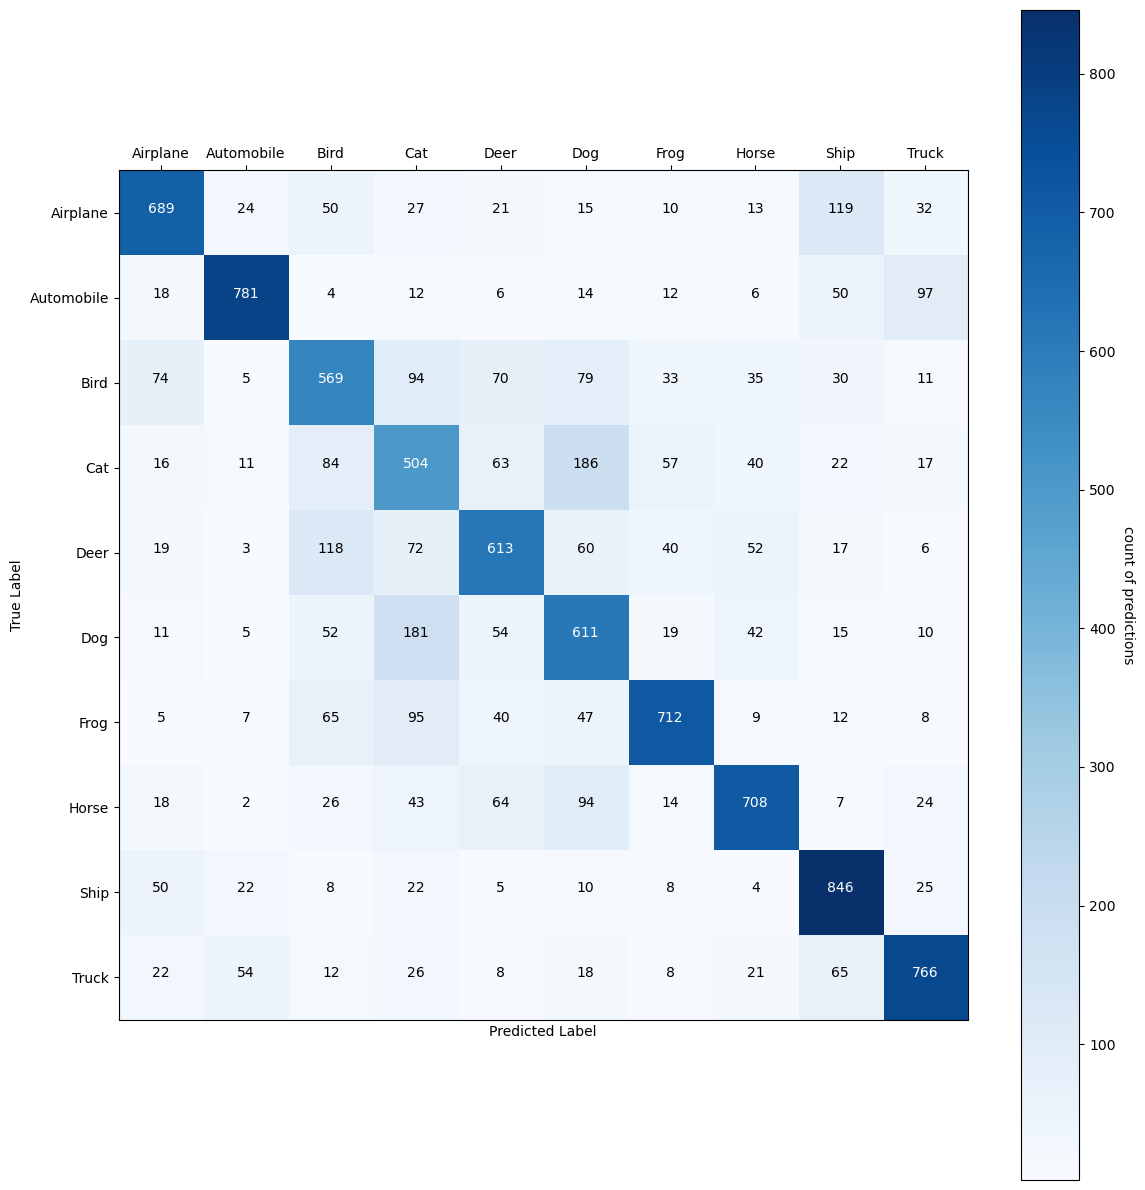

In [13]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, labels, labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

fig.tight_layout()
plt.show()

# Generating classification report (summary) for all classes

In [14]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1000
           1       0.85      0.78      0.82      1000
           2       0.58      0.57      0.57      1000
           3       0.47      0.50      0.49      1000
           4       0.65      0.61      0.63      1000
           5       0.54      0.61      0.57      1000
           6       0.78      0.71      0.74      1000
           7       0.76      0.71      0.73      1000
           8       0.72      0.85      0.78      1000
           9       0.77      0.77      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



## With the help of the above table and the confusion matrix, we can say that the automobile class has the highest performance.

# Checking for correct predictions

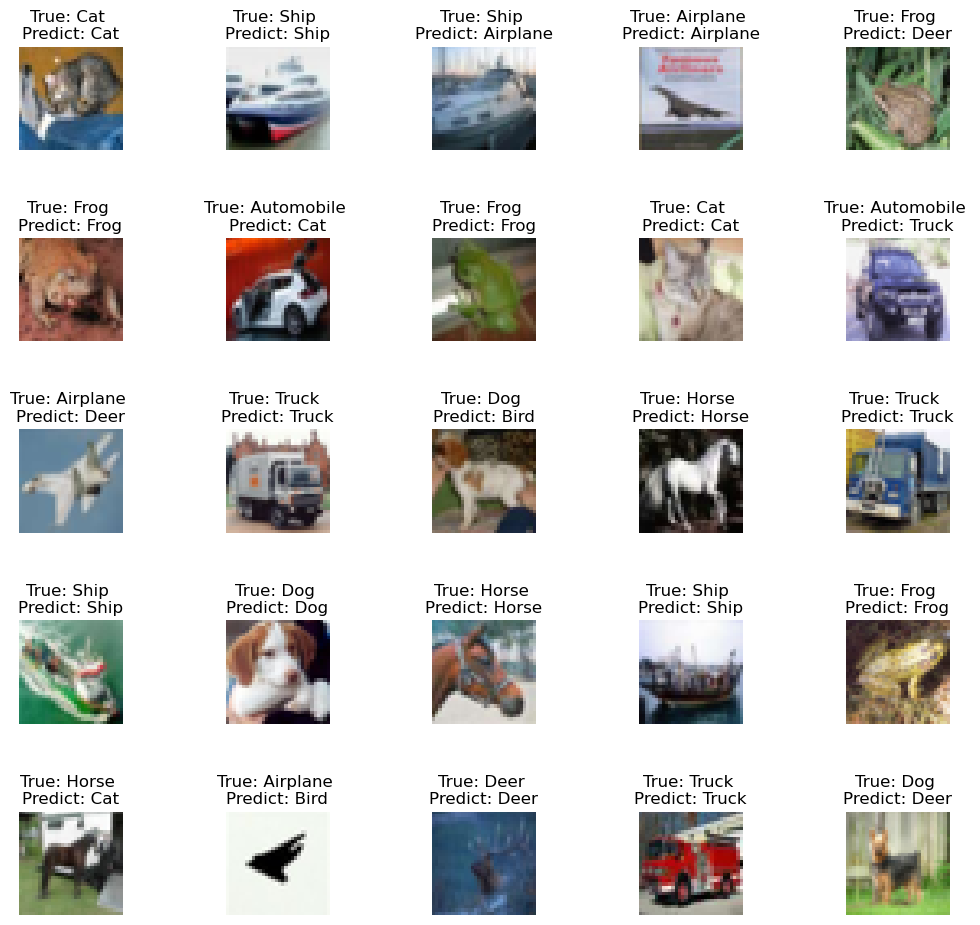

In [15]:
rows = 5
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, rows*cols):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Checking for wrong predictions

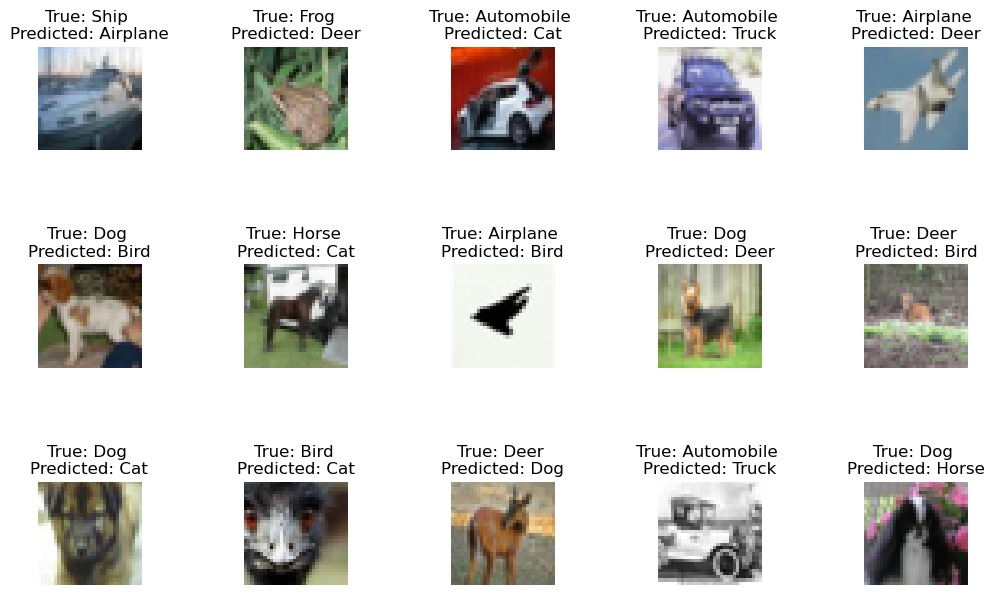

In [16]:
rows = 3
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(12,8))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, rows*cols):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

# Checking for extremely wrong predictions

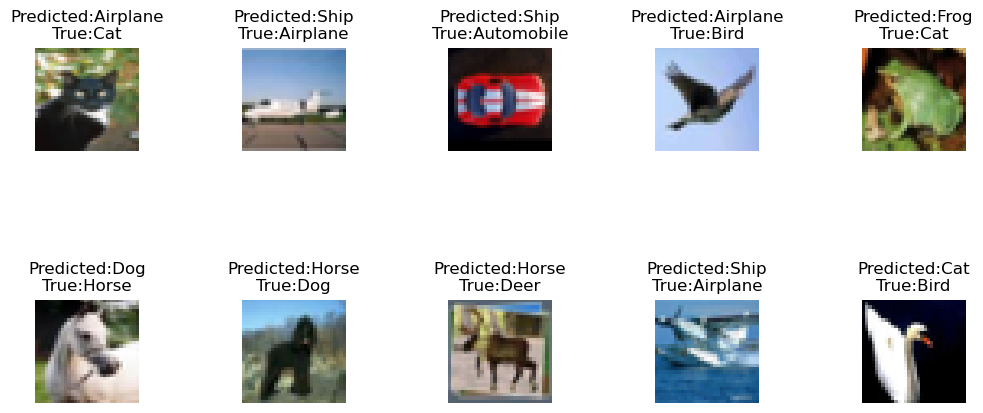

In [17]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 10 images with their predicted and real labels"""
    n = 0
    rows = 2
    cols = 5
    fig, ax = plt.subplots(rows,cols,sharex=True,sharey=True, figsize=(12,6))
    for row in range(rows):
        for col in range(cols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((32,32,3)))
            ax[row,col].set_title("Predicted:{}\nTrue:{}".
                                  format(labels[pred_errors[error]],labels[obs_errors[error]]))
            n += 1
            ax[row,col].axis('off')
            plt.subplots_adjust(wspace=1)

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 10 errors 
most_important_errors = sorted_dela_errors[-10:]

# Show the top 10 errors
display_errors(most_important_errors, X_test_errors, Y_pred_classes_errors, Y_true_errors)

# Testing the model for specific test images

In [18]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = np.argmax(model.predict(x_test), axis=-1)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(labels[dict_key],
                                                      labels[Y_true[number]]))

313/313 [==============================] - 2s 5ms/step


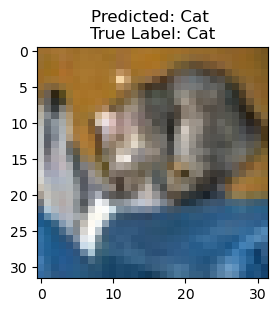

In [23]:
show_test(0)